In [2]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

path = 'C:\\SNU EnSite\\JSSP_V2\\GA_geneticpython\\MIO\\'
filepath = os.path.join(path,'Result_240728_total.csv')
data = pd.read_csv(filepath, index_col=0)
data

,Data,Mode,Makespan,Time
1,abz5,Plain,1340,53.0481
2,abz5,Plain,1403,53.7443
3,abz5,Plain,1354,53.7672
4,abz5,Plain,1293,53.3483
5,abz5,Plain,1371,53.9447
...,...,...,...,...
496,test_5020,Fitness,2251,549.9364
497,test_5020,Fitness,2284,542.6441
498,test_5020,Fitness,2204,578.1220
499,test_5020,Fitness,2157,590.7232


In [11]:
data[data['Data']=='abz5']['Time'].mean()

53.591527499999984

In [18]:
df_time = {}
for mode in ['Plain', 'Fitness', 'Crossover', 'Replacement']:
    df_time[mode]={}
    for dataset in data['Data'].unique().tolist():
        df_time[mode][dataset] =         round(data[(data['Data']==dataset) & (data['Mode']==mode)]['Time'].mean(),3)

df_time = pd.DataFrame(df_time)
df_time

,Plain,Fitness,Crossover,Replacement
abz5,53.866,54.296,53.442,52.763
abz6,53.102,54.159,52.043,51.587
abz7,158.362,139.021,136.485,136.052
abz8,136.017,138.120,134.039,136.436
abz9,136.698,140.509,137.077,135.152
test_10015,950.367,974.926,731.125,713.319
test_2020,185.900,188.401,196.962,198.671
test_3030,439.852,465.521,400.638,399.446
test_4040,686.971,724.606,675.752,681.554
test_5020,554.521,564.122,517.070,508.547


In [19]:
df_normalized = df_time.copy()
for col in df_time.columns:
    df_normalized[col] = (df_time[col] / df_time['Plain']) * 100
df_normalized

,Plain,Fitness,Crossover,Replacement
abz5,100.0,100.798277,99.212862,97.952326
abz6,100.0,101.990509,98.005725,97.147000
abz7,100.0,87.786843,86.185449,85.912024
abz8,100.0,101.546130,98.545770,100.308050
abz9,100.0,102.787897,100.277254,98.869040
test_10015,100.0,102.584160,76.930807,75.057215
test_2020,100.0,101.345347,105.950511,106.869822
test_3030,100.0,105.835827,91.084728,90.813728
test_4040,100.0,105.478397,98.366889,99.211466
test_5020,100.0,101.731404,93.246243,91.709241


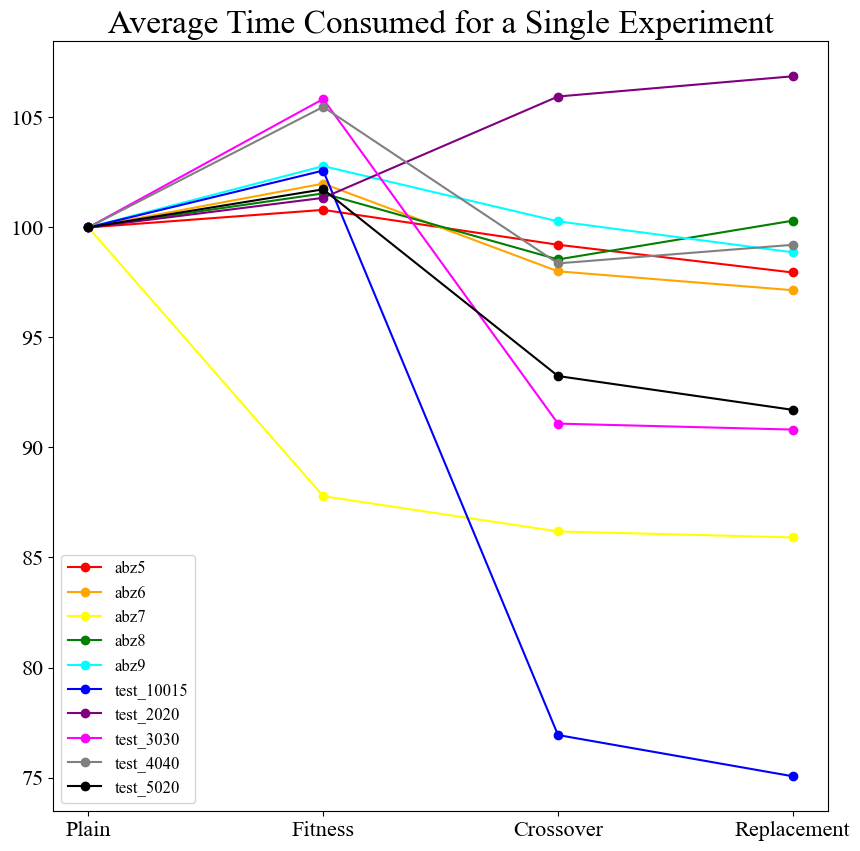

In [28]:
c_dict = ['red', 'orange', 'yellow', 'green' , 'cyan', 'blue', 'purple', 'magenta', 'grey', 'black']
plt.figure(figsize = (10, 10))
for i, mode in enumerate(data['Data'].unique().tolist()):
    plt.plot(df_normalized.iloc[i], label = mode, marker='o', color=c_dict[i])
plt.legend()
plt.title('Average Time Consumed for a Single Experiment')
plt.show()

In [27]:
SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 24

plt.rcParams['font.family'] = 'Times New Roman'
# plt.rcParams.update({'font.size': 14})
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

color = {'abz5':'tab:red', 'ATCS':'tab:orange', 'SSPT':'tab:green', 'MDD':'tab:blue','COVERT':'tab:purple'}

# 1. 시간에 대한 box plot

In [29]:
df_makespan = {}
for mode in ['Plain', 'Fitness', 'Crossover', 'Replacement']:
    df_makespan[mode]={}
    for dataset in data['Data'].unique().tolist():
        df_makespan[mode][dataset] =         round(data[(data['Data']==dataset) & (data['Mode']==mode)]['Makespan'].mean(),3)

df_makespan = pd.DataFrame(df_makespan)
df_makespan

,Plain,Fitness,Crossover,Replacement
abz5,1362.4,1417.6,1340.6,1325.1
abz6,1053.4,1116.1,1003.4,991.2
abz7,891.9,964.2,806.3,789.8
abz8,935.9,987.7,831.5,811.1
abz9,944.8,1012.0,898.2,869.2
test_10015,3448.2,3552.0,2994.7,2960.1
test_2020,1111.1,1175.9,984.5,976.1
test_3030,1914.7,2030.3,1559.4,1531.0
test_4040,2695.7,2843.2,2055.2,2008.3
test_5020,2122.5,2226.2,1671.7,1646.5


In [34]:
df_makespan.columns


Index(['Plain', 'Fitness', 'Crossover', 'Replacement'], dtype='object')

In [39]:
df_makespan.index

Index(['abz5', 'abz6', 'abz7', 'abz8', 'abz9', 'test_10015', 'test_2020',
       'test_3030', 'test_4040', 'test_5020'],
      dtype='object')

In [46]:
df_makespan = pd.read_csv('Table_Makespan.csv', encoding='cp949')
df_makespan

,Unnamed: 0,Basic GA,Adaptive Fitness,MIO Crossover,MIO Replacement
0,abz5(10×10),1362.4,1417.6,1340.6,1325.1
1,abz6(10×10),1053.4,1116.1,1003.4,991.2
2,abz7(20×15),891.9,964.2,806.3,789.8
3,abz8(20×15),935.9,987.7,831.5,811.1
4,abz9(20×15),944.8,1012.0,898.2,869.2
5,Custom(20×20),1111.1,1175.9,984.5,976.1
6,Custom(30×30),1914.7,2030.3,1559.4,1531.0
7,Custom(40×40),2695.7,2843.2,2055.2,2008.3
8,Custom(50×20),2122.5,2226.2,1671.7,1646.5
9,Custom(100×15),3448.2,3552.0,2994.7,2960.1


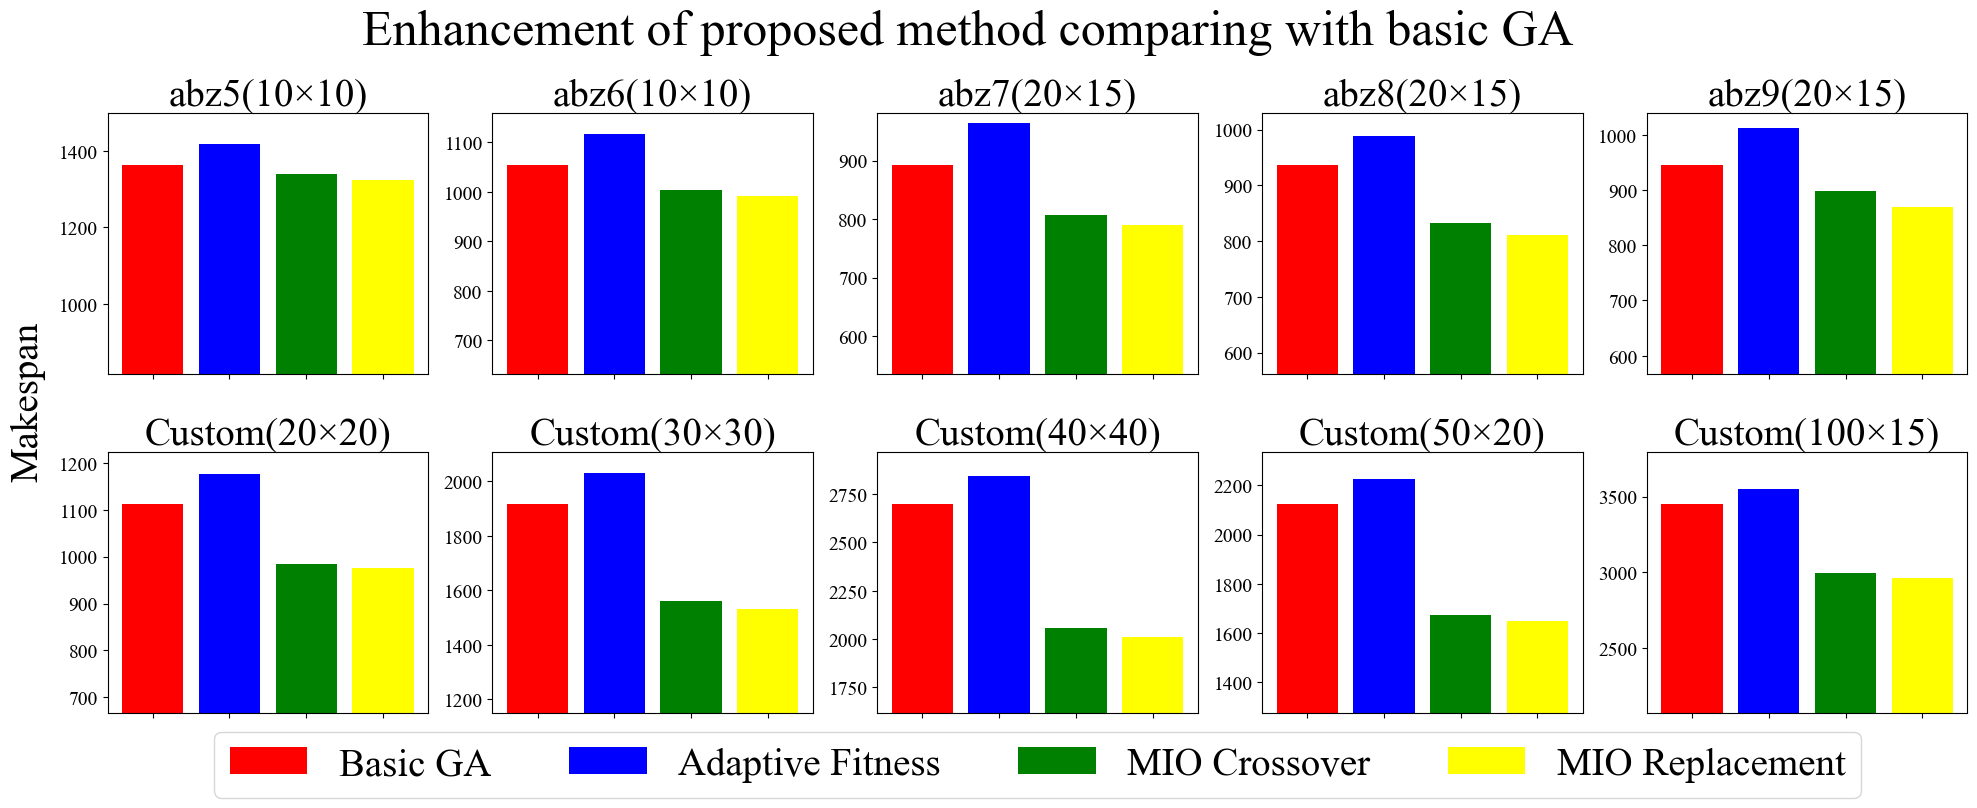

In [48]:
data = pd.read_csv('Table_Makespan.csv', encoding='cp949')

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 28
plt.rcParams['font.family'] = 'Times New Roman'
# plt.rcParams.update({'font.size': 14})
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig = plt.figure(figsize=(20, 8))
axes = [fig.add_subplot(2, 5, i + 1) for i in range(10)]
plt.suptitle("Enhancement of proposed method comparing with basic GA", fontsize=36)
for i in range(10):
    for j, color in enumerate(['red', 'blue', 'green', 'yellow']):
        axes[i].bar(data.columns[j+1],data.iloc[i][j+1],color=color, label = data.columns[j+1])
    # axes[i].bar(data.columns[2],data.iloc[i][2],color='red')
    # axes[i].bar(data.columns[3],data.iloc[i][3],color='red')
    # axes[i].bar(data.columns[4],data.iloc[i][4],color='red')
    axes[i].set_title(data.iloc[i,0])
    axes[i].set_ylim([data.iloc[i][1]*0.6, data.iloc[i][1]*1.1])
    axes[i].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
# plt.subplots_adjust(wspace=0.5, left = 0.07, right = 1., top = 1., bottom=0.)
fig.text(0.03, 0.4, 'Makespan', ha='center', rotation='vertical', fontsize = 28)
# leg = axes[7].legend(loc='lower center', bbox_to_anchor=(1, 1.3))
leg = axes[7].legend(loc='lower center',ncol=4,bbox_to_anchor=(0.5, -0.4))
plt.subplots_adjust(hspace = 0.3, left = 0.07, right = 1., top = 0.85, bottom=0.1)
# plt.legend(loc='lower center')
# plt.tight_layout()
plt.savefig('Result.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. Makespan